# 타이타닉 Data 실습

In [1]:
# Data 연산
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 전처리 
from sklearn.impute import SimpleImputer # 결측치 처리
from sklearn.preprocessing import LabelEncoder # 라벨링
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 표준화/정규화

from sklearn.model_selection import StratifiedKFold  # 편중 방지(cv 값 생성)
from sklearn.model_selection import train_test_split # 데이터 분할

from sklearn.ensemble import RandomForestClassifier # 분류 모델
from sklearn.tree import DecisionTreeClassifier # 분류 모델
from sklearn.linear_model import LogisticRegression # 회귀 모델
from sklearn.metrics import accuracy_score # 모델 평가

# ETC
import warnings # Deprecate Warning 제거
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../data/train.csv')
df_raw = df.copy() # 원본 데이터 혹시 모르니 keep

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df['Cabin'].unique() # 배 구조상 A가 가장 위층

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
# 결측치 처리

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('N')
df['Embarked'] = df['Embarked'].fillna('N')

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
# 불필요한 컬럼 제거(상상력으로 최대한 제거하지 않고 활용 요망)

df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True) # inplace=True : 원본을 변경(재할당)

In [8]:
# df['Sex'] = df['Sex'].map({'male':0, 'female':1})
# df['Embarked'] = df['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

from sklearn.preprocessing import LabelEncoder

# le_sex = LabelEncoder()
# df['Le_Sex'] = le_sex.fit_transform(df['Sex'])

# le_cabin = LabelEncoder()
# df['Le_Cabin'] = le_cabin.fit_transform(df['Cabin'])

# le_embarked = LabelEncoder()
# df['Le_Embarked'] = le_embarked.fit_transform(df['Embarked'])

def labeling_columns_simple(data_frame, columns):

    for column in columns:
        data_frame[column] = LabelEncoder().fit_transform(data_frame[column])

labeling_columns_simple(df, ['Sex', 'Cabin', 'Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,3
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,3
3,1,1,0,35.0,1,0,53.1000,55,3
4,0,3,1,35.0,0,0,8.0500,146,3


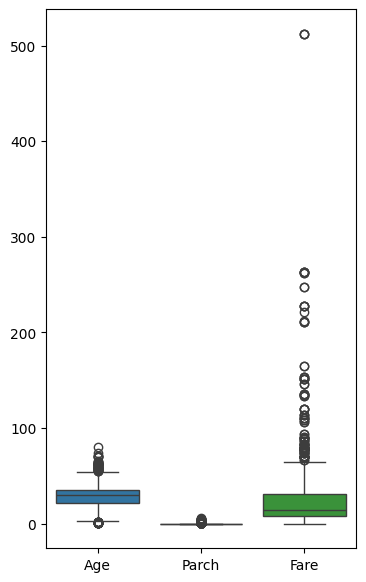

In [9]:
plt.figure(figsize=(4,7))
sns.boxplot(data=df[['Age','Parch','Fare']])
plt.show()

In [10]:
def remove_iqr_same(df, columns):
    
    df_clean = df.copy()

    ranges = []
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
    
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
    
        ranges.append((lower, upper))
    
    for index, col in enumerate(columns):
        lower, upper = ranges[index]
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    return df_clean

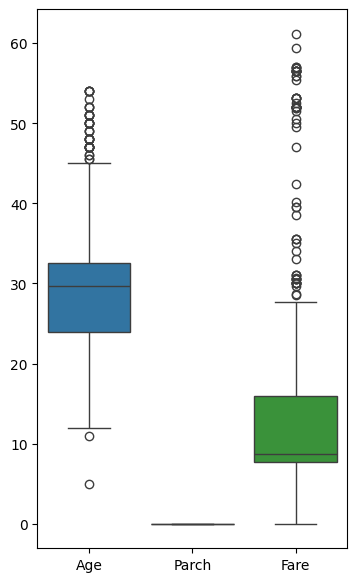

In [11]:
# 이상치 제거

df = remove_iqr_same(df, ['Age','Parch','Fare'])

plt.figure(figsize=(4,7))
sns.boxplot(data=df[['Age','Parch','Fare']])
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

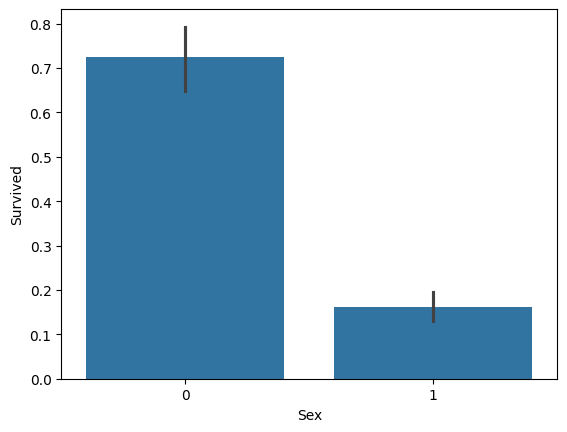

In [12]:
# 독립 변수 판별(종속변수 - 생존)

# 성별
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

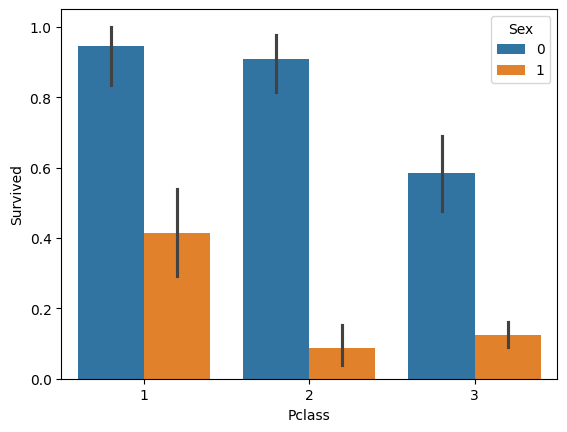

In [13]:
# 등급
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df) # hue

In [14]:
# 스케일링 
std_scaler = StandardScaler() # 표준화(머신러닝에서 가장 일반적)
std_scaler.fit_transform(df)

array([[-0.65815524,  0.67896964,  0.57801504, ..., -0.61133855,
         0.31558464,  0.50560041],
       [ 1.51939838,  0.67896964, -1.7300588 , ..., -0.55766662,
         0.31558464,  0.50560041],
       [ 1.51939838, -2.05105411, -1.7300588 , ...,  3.03437735,
        -2.90312215,  0.50560041],
       ...,
       [ 1.51939838, -2.05105411, -1.7300588 , ...,  1.19760445,
        -3.78738226,  0.50560041],
       [ 1.51939838, -2.05105411,  0.57801504, ...,  1.19760445,
        -2.72627013, -2.38330721],
       [-0.65815524,  0.67896964,  0.57801504, ..., -0.57158156,
         0.31558464, -0.45736879]])

In [15]:
# 데이터 분리

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

# 분류 모델

dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

In [16]:
dt_model.fit(X_train, y_train) # (테스트 문제, 테스트 답) - 지도 학습
result = dt_model.predict(X_test) # (테스트 문제) => 예측한 답(result) -> 실제 답(y_test)과 비교
accuracy_score(result, y_test)

0.7586206896551724

In [17]:
rf_model.fit(X_train, y_train) # (테스트 문제, 테스트 답) - 지도 학습
result = rf_model.predict(X_test) # (테스트 문제) => 예측한 답(result) -> 실제 답(y_test)과 비교
accuracy_score(result, y_test)

0.8017241379310345

In [18]:
lr_model.fit(X_train, y_train) # (테스트 문제, 테스트 답) - 지도 학습
result = lr_model.predict(X_test) # (테스트 문제) => 예측한 답(result) -> 실제 답(y_test)과 비교
accuracy_score(result, y_test)

0.8017241379310345